<a href="https://colab.research.google.com/github/OviRata/PMP-2024/blob/main/PMP_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pymc

In [8]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

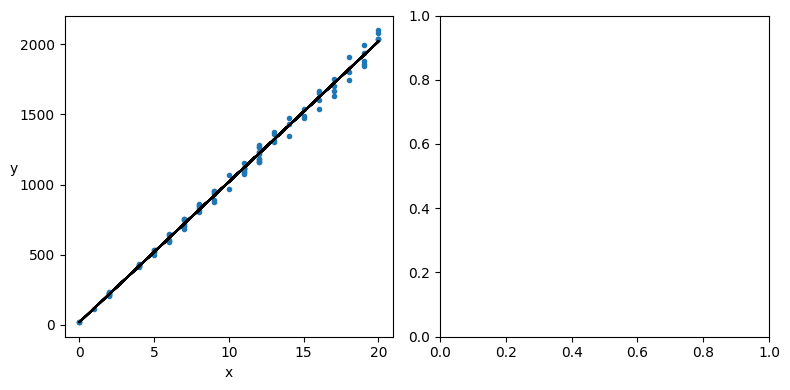

In [12]:
#a)
age = [];
revenue = [];
revenue_real = [];
initial_A=100;
initial_B=20;
error_percent = 5;

for i in range(0,100):
  someAge = np.random.randint(21);
  someRealRevenue = (initial_A * someAge + initial_B);
  someRevenue = someRealRevenue * ( 100 + error_percent - np.random.randint( error_percent*2+1 ) )/100;
  age.append(someAge);
  revenue.append(someRevenue);
  revenue_real.append(someRealRevenue);

_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(age, revenue, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(age, revenue_real, 'k')
plt.tight_layout()

#print(age)
#print(revenue);

Output()

Output()

99.85056157385733
21.593638475709124


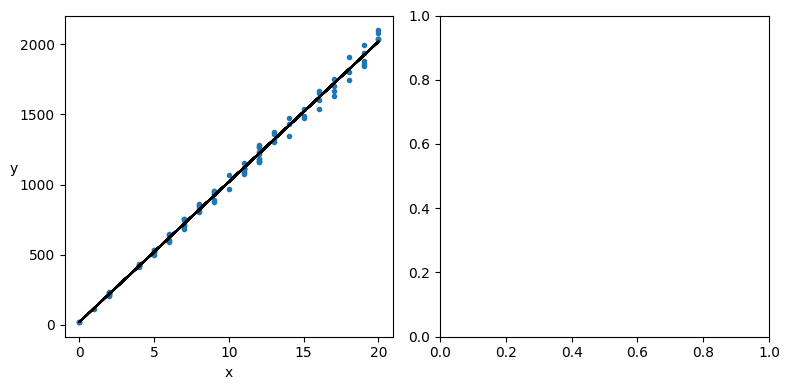

In [21]:
with pm.Model() as model:
  alpha = pm.Normal('α', mu=100, sigma=100)
  beta = pm.Normal('β', mu=20, sigma=100)
  eps = pm.HalfCauchy('ε', 100)
  mu = pm.Deterministic('μ', beta + alpha * age)
  y_pred = pm.Normal('y_pred', mu=mu, sigma=eps, observed=revenue);

  idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

  posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
  alpha_m = posterior_g['α'].mean().item()
  beta_m = posterior_g['β'].mean().item()
  print(alpha_m);
  print(beta_m);
  revenue_predicted = [ alpha_m*x+beta_m for x in age ];
  _, ax = plt.subplots(1, 2, figsize=(8, 4))
  ax[0].plot(age, revenue, 'C0.')
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('y', rotation=0)
  ax[0].plot(age, revenue_predicted, 'k')
  plt.tight_layout()